# Reading

Read the fourth and fifth chapter (pg 68-104) of *Weapons of Math Destruction* and summarize the main ideas below.

1. **O'Neil describes how predictive models are applied to advertising. Who benefits from these applications, and who is harmed by them?**

In these examples it is both the ad company and the company being advertise who benfit. The ad company uses "lead generating" tactics to influence people in certain ways and then the ad company sells this lead to the advertise company who then can make a profit off them. Much of this involves targeting certain demographics with messages designed to intrigue them. Those harmed by these ads are those seeing them but in particular those that are tageted. For example many of these ads are geared towards pushing education (ie student loans) on low socioeconomic individuals and thus provide what appears to be an education and through that a living but does not hint at the crippling amount of debt it amounts.

2. **O'Neil describes how predictive models are applied to policing. Who benefits from these applications, and who is harmed by them?**

These models are used to predict where crime is likely to occur and is implemented by police forces that do not have the resources to patrolly everywhere. This benefits the cops who can say that there rates of crime are now down by these models but the model does not differentiate between petty crimes and violents crimes. This incorportation of petty crime is predomioently found in low socioeconomic neighborhoods and including this in the model causes more cops in the area arresting more people for petty crime and thus further enforcing the model. This results in extremely biased predictons that target impoverished neighborhoods and certain demographics. This results in many people in the higher policed neighborhoods to be arrested and charged for non-violent victim-less crimes that otherwise would never have been arrested and essentially penalizing poverty.

3. **O'Neil describes how she'd like to see predictive models applied to the justice system. Who would benefit and who would be harmed?**

O'neil descrobes how in law people are innocent until proven guilty but in modeling it is more important to classify guilty then not. O'neil wants to move beyond basic trends and dig deeply into trends within prisons that impacts peoples lives and descicions long after they get out. This includes both neagative and positive predictors from solitary time to amount of sunlight and food a day. In this way prisons could be optimized to help prepare people for a world after jail and prevent reoccurences. The current system is much like many of the other models we have seen where what goes on in the back is never seen (just like in the prison) and much like these other models, understanding what goes into them (ie what happens in prison) can be a major factor in eliminating biases and postive feed-back loops. The models should be used to determine policy on how to make positive impacts and not just negative classifications like guilty or recidivism.

# Regularized regression

Suppose a real estate agency wants to predict home prices in their area. They have collected a [dataset](https://myslu.stlawu.edu/~ltorrey/ml/Homes.csv) of 2931 homes. The 80 predictors describe everything they can think of that might be relevant to the response (which is called *sale_price*).

Choose a regression technique to recommend for this task. Specifically:

1. **Compare linear regression and its regularized versions (ridge and lasso).**
2. **Identify the best technique for this task and explain your choice.**
3. **Perform that technique on the full dataset to produce a final model.**
4. **Identify the lambda you would choose for that final model.**
5. **Report the number of predictors the model effectively contains.**

In [ ]:
download.file("https://myslu.stlawu.edu/~ltorrey/ml/Homes.csv", "dataset.csv")
data <- read.csv("dataset.csv", stringsAsFactors = TRUE)
install.packages("glmnet") # ~ 3 minutes
library(glmnet) # glmnet, cv.glmnet


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
install.packages("splitTools")
library(splitTools) # create_folds
# Create CV folds
folds <- create_folds(data$sale_price, k = 5)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
# Calculating MSE of normal linear, ridge and lasso models
# Estimate future error of unregularized linear regression
mse <- rep(0, 5)
i <- 1

for (train in folds) {
  x_train <- model.matrix(sale_price ~ ., data[train,])[, -1]
  x_test <- model.matrix(sale_price ~ ., data[-train,])[, -1]
  y_train <- data[train,]$sale_price
  y_test <- data[-train,]$sale_price
  model <- glmnet(x_train, y_train, lambda = 0)
  predictions <- predict(model, newx = x_test)
  mse[i] <- mean((predictions - y_test) ** 2)
  i <- i + 1
}

print(paste("Non-regularized:", sqrt(mean(mse))))

# Estimate future error for ridge
mse <- rep(0, 5)
i <- 1

for (train in folds) {
  x_train <- model.matrix(sale_price ~ ., data[train,])[, -1]
  x_test <- model.matrix(sale_price ~ ., data[-train,])[, -1]
  y_train <- data[train,]$sale_price
  y_test <- data[-train,]$sale_price
  model <- cv.glmnet(x_train, y_train, standardize = TRUE, alpha = 0)
  predictions <- predict(model, newx = x_test, s = model$lambda.min)
  mse[i] <- mean((predictions - y_test) ** 2)
  i <- i + 1
}
print(paste("Ridge:", sqrt(mean(mse))))


# Estimate future error of lasso regression
mse <- rep(0, 5)
i <- 1

for (train in folds) {
  x_train <- model.matrix(sale_price ~ ., data[train,])[, -1]
  x_test <- model.matrix(sale_price ~ ., data[-train,])[, -1]
  y_train <- data[train,]$sale_price
  y_test <- data[-train,]$sale_price
  model <- cv.glmnet(x_train, y_train, standardize = TRUE, alpha = 1)
  predictions <- predict(model, newx = x_test, s = model$lambda.min)
  mse[i] <- mean((predictions - y_test) ** 2)
  i <- i + 1
}

print(paste("Lasso:", sqrt(mean(mse))))

[1] "Non-regularized: 38287.0396937848"
[1] "Ridge: 29442.0248034309"
[1] "Lasso: 30229.4483994259"


I am choosing to regularize my model with ridge regression which will tend to not eliminate predictors but shrink irrelvant ones to smaller coeffecients. I am doing this because out of a normal linear regression, ridge regression and lasso regressions the ridge has the lowest MSE.

In [ ]:
# Ridge
# Perform ridge regression (alpha = 0) with full dataset
x <- model.matrix(sale_price ~ ., data)[, -1]
y <- data$sale_price
ridge.lm <- cv.glmnet(x, y, standardize = TRUE, alpha = 0)



[1] 13041.3

[1] 69597.5

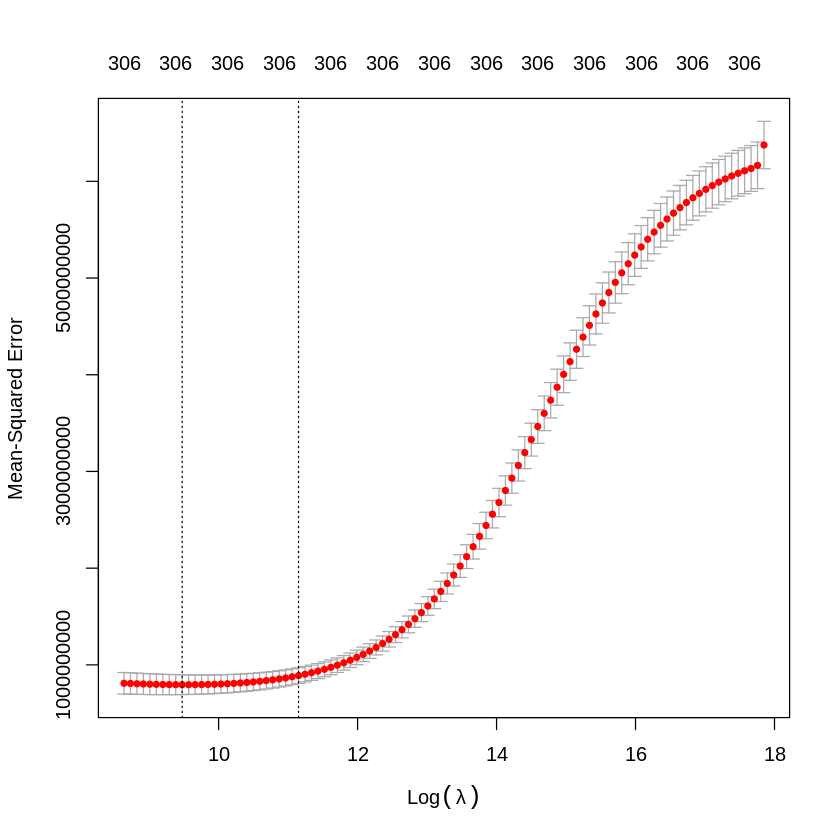

In [ ]:
# Identify Final Lambda
plot(ridge.lm)
# Lambda options
ridge.lm$lambda.min
ridge.lm$lambda.1se


# As we can see in the plot the values of lambda.min and lambda.1se have similar MSE. Based off this I would then choose the lambda min as it is lower and want to priotize future error rather then simplicity.
# Lambda min minmizes the error where as lambda w/ 1 se allows for wider spread in the model (via a simpler model) but in this case did not have any significant differences then min.
# Lambda Value - 13041.299


In [ ]:
# Coefficient effects
full.coef <- coef(lm(sale_price ~ ., data = data))
ridge.coef <- as.vector(coef(ridge.lm, s = ridge.lm$lambda.min))
options(scipen=100) # Don't use scientific notation
data.frame(cbind(full.coef, ridge.coef))

,full.coef,ridge.coef
,<dbl>,<dbl>
(Intercept),-9863821.2707376,-8519936.00483890
ms_subclassOne_and_Half_Story_Finished_All_Ages,23712.4642859,2329.29882500
ms_subclassOne_and_Half_Story_PUD_All_Ages,-24535.0516679,-39130.04438676
ms_subclassOne_and_Half_Story_Unfinished_All_Ages,28332.1951028,4284.15017362
ms_subclassOne_Story_1945_and_Older,20402.2881638,429.20963530
ms_subclassOne_Story_1946_and_Newer_All_Styles,16109.3501236,2989.87420805
ms_subclassOne_Story_PUD_1946_and_Newer,-1637.1629950,-5956.11661705
ms_subclassOne_Story_with_Finished_Attic_All_Ages,28050.0755129,3506.00035802
ms_subclassPUD_Multilevel_Split_Level_Foyer,-5647.0993382,-4754.50456993


The ridge model contains 306 predictors and an intercept in the model. Some predictors were penelized and now have coeffecients close to 0.

# Regularized classification

Suppose a company wants to predict which of its customers will approve of a new ad campaign. They have collected a [dataset](https://myslu.stlawu.edu/~ltorrey/ml/Customers.csv) of 724 customers. The 85 predictors describe everything they can think of that might be relevant to the response (which is called *approve*).

Choose a classification technique to recommend for this task. Specifically:

1. **Compare logistic regression and its regularized versions (ridge and lasso).**
2. **Identify the best technique for this task and explain your choice.**
3. **Perform that technique on the full dataset to produce a final model.**
4. **Identify the lambda you would choose for that final model.**
5. **Report the number of predictors the model effectively contains.**

In [ ]:
download.file("https://myslu.stlawu.edu/~ltorrey/ml/Customers.csv", "dataset.csv")
data2 <- read.csv("dataset.csv", stringsAsFactors = TRUE)
# Create CV folds
folds <- create_folds(data2$approve, k = 5)


In [ ]:
# non-reg-linear error rate

error <- rep(0, 5)
i <- 1

for (train in folds){
  x_train <- model.matrix(approve ~ ., data2[train,])[, -1]
  x_test <- model.matrix(approve ~ ., data2[-train,])[, -1]
  y_train <- data2[train,]$approve
  y_test <- data2[-train,]$approve
  model <- glmnet(x_train, y_train, lambda = 0, family = "binomial")
  predictions <- predict(model, newx = x_test)
  prob <- ifelse(predictions > 0.5, 'Yes', 'No')
  error[i] <- mean((prob != y_test))
  i <- i + 1
}
print(paste("non-regular:", mean(error)))

error <- rep(0, 5)
i <- 1



for (train in folds){
  x_train <- model.matrix(approve ~ ., data2[train,])[, -1]
  x_test <- model.matrix(approve ~ ., data2[-train,])[, -1]
  y_train <- data2[train,]$approve
  y_test <- data2[-train,]$approve
  model <- cv.glmnet(x_train, y_train, standardize = TRUE, alpha = 0, family = "binomial")
  predictions <- predict(model, newx = x_test, s = model$lambda.min)
  prob <- ifelse(predictions > 0.5, 'Yes', 'No')
  error[i] <- mean((prob != y_test))
  i <- i + 1
}
print(paste("Ridge:", mean(error)))


error <- rep(0, 5)
i <- 1

for (train in folds){
  x_train <- model.matrix(approve ~ ., data2[train,])[, -1]
  x_test <- model.matrix(approve ~ ., data2[-train,])[, -1]
  y_train <- data2[train,]$approve
  y_test <- data2[-train,]$approve
  model <- cv.glmnet(x_train, y_train, standardize = TRUE, alpha = 1, family = "binomial")
  predictions <- predict(model, newx = x_test, s = model$lambda.min)
  prob <- ifelse(predictions > 0.5, 'Yes', 'No')
  error[i] <- mean((prob != y_test))
  i <- i + 1
}
print(paste("Lasso:", mean(error)))





[1] "non-regular: 0.349885057471264"
[1] "Ridge: 0.334722222222222"
[1] "Lasso: 0.333342911877395"


All three of the models are fairly uniform in terms of mean error. Because of this I chose to use a lasso model based off its other characteristics. The lasso model eliminates (by giving coeffeciants of 0 to less-important predictors) predictors and in doing so builds a "simpler". Having a model with less predictors that can perform to the same level is generally better then more complicated ones.

[1] 0.01754742

[1] 0.03365437

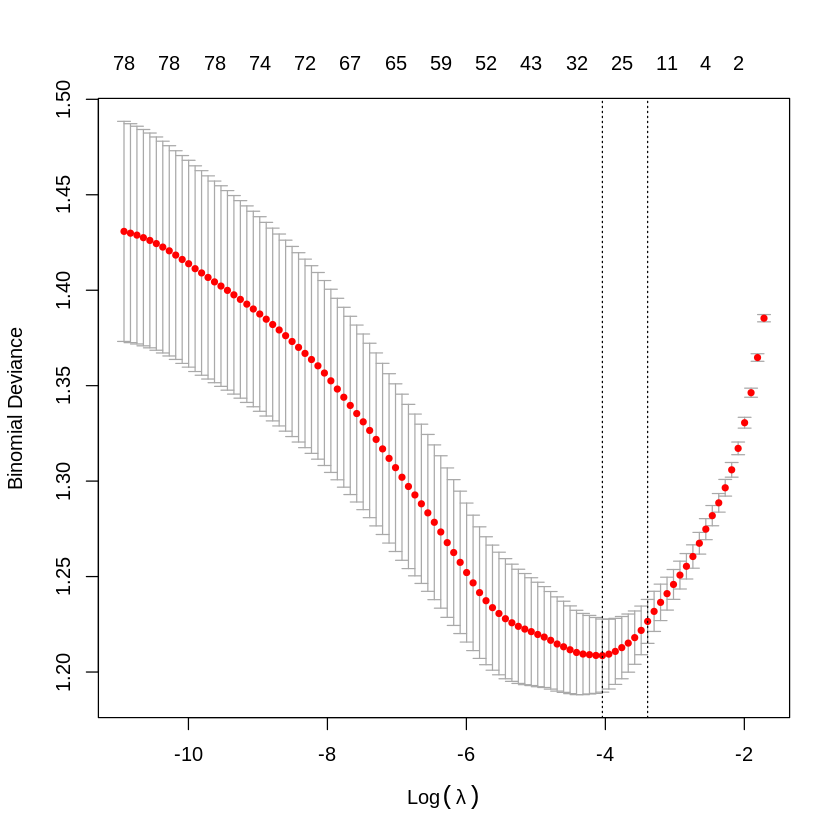

In [ ]:
# Final Model and Lambda Choosing
x <- model.matrix(approve ~ ., data2)[, -1]
y <- data2$approve
final_model <- cv.glmnet(x, y, standardize = TRUE, alpha = 1, family = "binomial")


# Identify Final Lambda
plot(final_model)
# Lambda options
final_model$lambda.min
final_model$lambda.1se

# The lambda min has lower binomial deviance then the 1se and I am prioritizing lower bionomial deviance over the simpler model with the 1se lambda.
# this would create a lambda value of 0.01925



In [ ]:
# Predictors
# Coefficient effects
library(tidyverse)
x <- model.matrix(approve ~ ., data2)[, -1]
y <- data2$approve

lasso.coef <- as.vector(coef(final_model, s = final_model$lambda.min))
data.frame(cbind(lasso.coef)) |> filter(lasso.coef != 0)

# This model uses 27 predictors and an intercept.


lasso.coef
<dbl>
-2.1495995602
-0.1407765593
0.0175079593
0.0590210253
0.0609914584
0.0202715804
0.0266486268
-0.1752135334
-0.0081957496
